<a href="https://www.kaggle.com/code/rukynas/sample-superstore?scriptVersionId=194846874" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-orders/superstore_orders.csv


# Introduction

This is a popular sales data from the internet which I will do some basic analysis on using python.

**QUESTIONS TO ANSWER:**  
* What is the relationship between sales and quantity?  
* Which category and Sub-category has the highest sales?  
* Which regions or states generate the most sales and profit?  
* What is the relationship between sales and profit across different regions?  
* How does discounting impact profit margins?  
* Which ship mode is most frequently used?  

# Understand your data

Lets start by loading the data

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/kaggle/input/superstore-orders/superstore_orders.csv')

We will check the first 10 rows of the data

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


check the last rows of the data

In [5]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


We will check the shape of our data

In [6]:
data.shape

(9994, 21)

Lets get more info on the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Data Cleaning

Lets check for missing values

In [9]:
df=pd.DataFrame(data)
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Perfect! No missing values. We will then Change the type of row id, postalcode columns and also the date data type.

In [10]:
df=pd.DataFrame(data)
df['Postal Code'] = df['Postal Code'].astype(str)
df['Row ID'] = df['Row ID'].astype(str)


In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   object        
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   object        
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Lets check our data for duplicates

In [13]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


Overall our data is quite clean. lets visualize the data!

# Exploratory Analysis and Visualization

For EDA we will perform **Frequency analysis** to determine the frequency of different categories. Then we perform **Correlation analysis** to explore the relationships between numerical variables. Also, **Data visualization** to visualize the data and identify patterns.


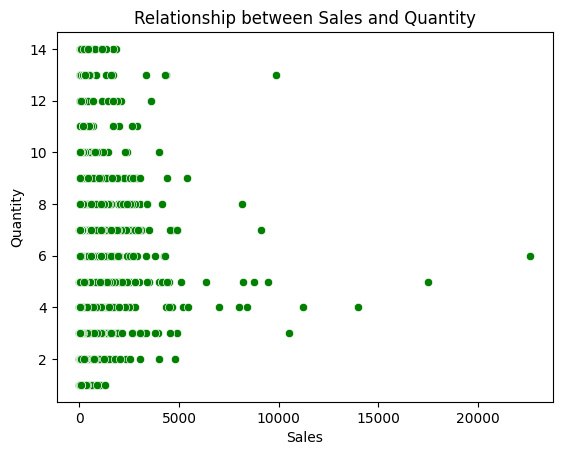

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Sales', y='Quantity', data=df, color='green')
plt.title('Relationship between Sales and Quantity')
plt.show()

We created a **scatter plot** to observe relationships between Sales and Quantity. The scatter plot shows a **positive relationship** between Sales and Quantity variables. As the Sales increase, the Quantity also increases, and this suggests that products with higher sales are most likely sold in larger quantities.

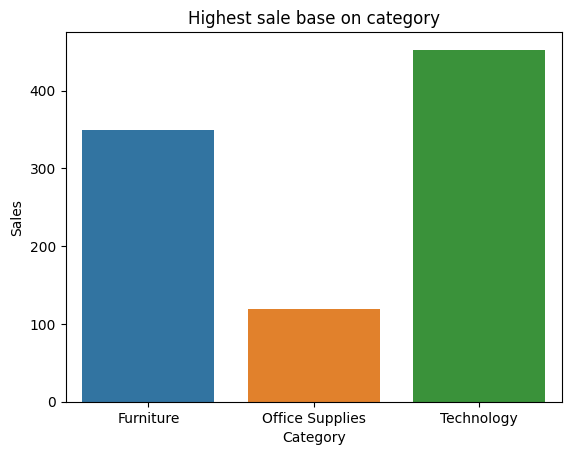

In [15]:
sns.barplot(x='Category', y='Sales', data=df, errorbar=None) #errorbar=None is similar to ci=None
plt.title('Highest sale base on category')
plt.show()

Visualizing data base on Sales and Category shows tha the **Technology category has the highest sales** compared to Furniture category and Office Supplies category.

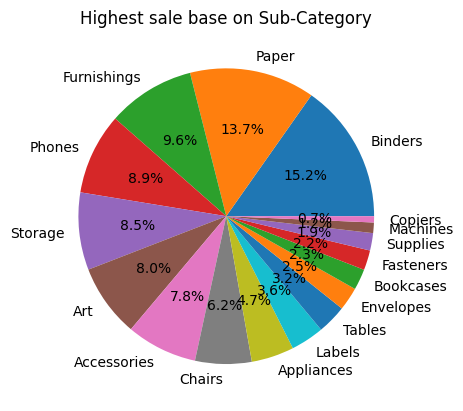

In [16]:
cat_pie = df['Sub-Category'].value_counts()
plt.pie(cat_pie, labels=df['Sub-Category'].value_counts().index, autopct='%1.1f%%' )
plt.title('Highest sale base on Sub-Category')
plt.show()

The pie chart shows **Binders and Paper have the highest** percentage of sales base on Sub-Category.

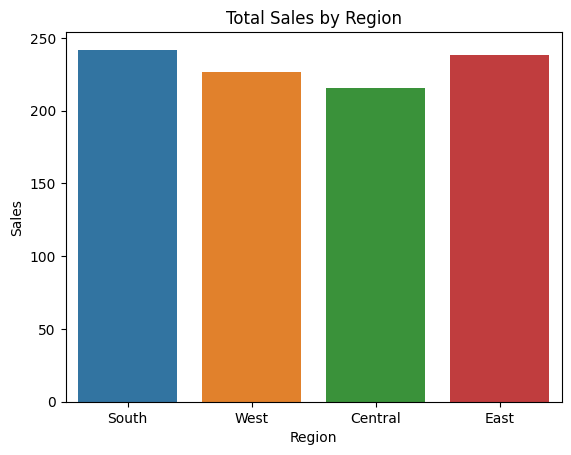

In [17]:
sns.barplot(x='Region', y='Sales', data=df, errorbar=None)
plt.title('Total Sales by Region')
plt.show()

The **East and South** are the Regions with **most Sales**.

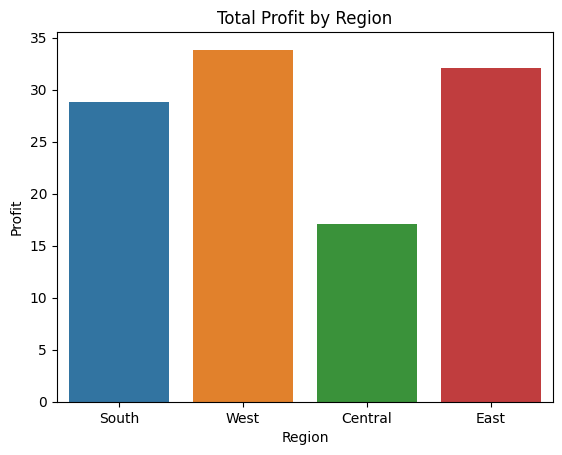

In [18]:
sns.barplot(x='Region', y='Profit', data=df, errorbar=None)
plt.title('Total Profit by Region')
plt.show()

The **East and West** are the Regions with **most Profit**.

**Correlation Analysis:** Now we check the correlation between Sales and Profit to validate the relationship.

In [19]:
correlation = df[['Sales', 'Profit']].corr()
print(correlation)


           Sales    Profit
Sales   1.000000  0.479064
Profit  0.479064  1.000000


The result above indicates there is **somewhat positive correlation between sales and profit** but its not very strong. Relationship between Sales vs Sales and profit vs Profit is 1, which indicates perfect relationship.

In [20]:
df['Profit Margin'] = df['Profit'] / df['Sales']

discount_profit_margin = df.groupby('Discount')['Profit Margin'].mean()

The above will check how discount impact profit margins. First I added a new column **Profit Margin** as Profit divided by Sales, and then Group by Discount. Now I will visualize this using line plot.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


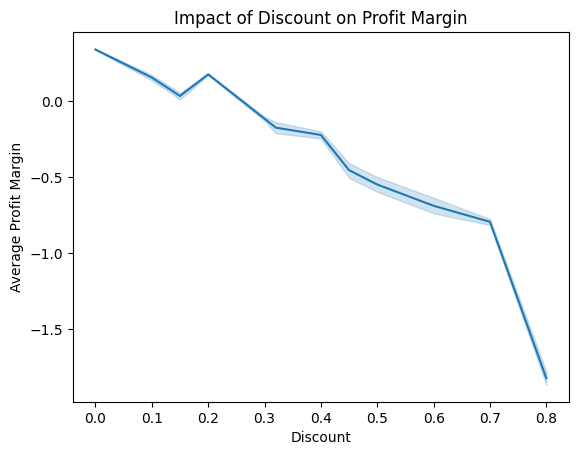

In [21]:
sns.lineplot(x='Discount', y='Profit Margin', data=df)
plt.title('Impact of Discount on Profit Margin')
plt.xlabel('Discount')
plt.ylabel('Average Profit Margin')
plt.show()


The line plot shows **Negative correlation**, as the discount level increases the average profit margin decreases. This indicate that offering higher discounts does not leads to more profit.

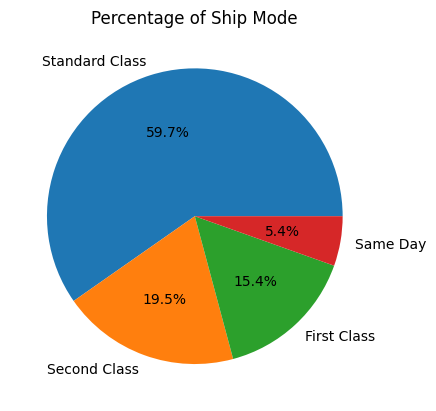

In [22]:
shipment_mode = df['Ship Mode'].value_counts()

plt.pie(shipment_mode,labels=df['Ship Mode'].value_counts().index, autopct='%1.1f%%')
plt.title('Percentage of Ship Mode')
plt.show()

Overall **Standard class is the most frequent Ship Mode** and Same Day is the less popular among the customers.

# Conclusion

* Products with higher sales are most likely sold in larger quantities.
* Technology category has the highest sales, and based on sub-category, Binders have the highest sales.
* The East Region has most Sales and most Profit.
* The relationship between sales and profit is not very strong. 
* Offering higher discounts does not leads to more profit.
* The customers use Standard class Ship Mode the most.

# Recommendation

* Since the east region is performing well, invest in marketing and sales efforts to further strengthen the company’s presence. 
* The company should explore ways to increase the profit margin for Binders and products in Technology category since they have highest sales.
* Investigation should be done on why more sales does not always lead to more profit.
* The company should explore ways to increase their sales through promotions, better marketing, etc
* Encourage customers to try out different Ship modes by given discounts or so.
* Products with Low profit should be re-evaluated.